In [1]:
#Importing necessary libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Loading the csv files
df_train = pd.read_csv(r"C:\Users\Joe Rishwanth\Desktop\ML Project\data\train.csv")
df_test = pd.read_csv(r"C:\Users\Joe Rishwanth\Desktop\ML Project\data\test.csv")



In [3]:
# Statistical properties of the training dataset
df_trainstats1=df_train[df_train.columns[1:]].describe()
df_trainstats2=df_train[df_train.columns[1:]].median()
df_trainstats3=df_train[df_train.columns[1:]].mean()


In [4]:
# Calulation of the target label percentage
total_len = len(df_train['seriousdlqin2yrs'])
percentage_labels = (df_train['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

In [5]:
# Calulation of the target label count
count_label = (df_train['seriousdlqin2yrs'].value_counts())
count_label

0    139974
1     10026
Name: seriousdlqin2yrs, dtype: int64

In [6]:
#Treating missing values
# No of missing values
df_train.isnull().sum()

id                                          0
seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

In [7]:
# Treatmnet of missing value using mean value.
training_data_mean_replace = df_train.fillna((df_train.mean()))
training_data_mean_replace.head()

,id,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
# Treatment of the missing value using median value.
traindata = df_train.fillna((df_train.median()))

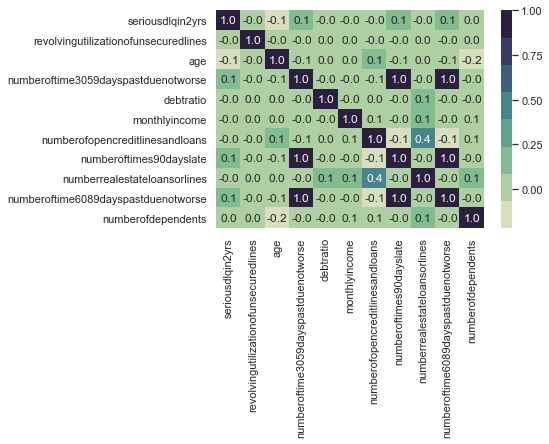

In [9]:
#Correlation of the training dataset
sns.set()
sns.heatmap(traindata[traindata.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

In [10]:
#Detecting outliers
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))
percentile_based_outlier(data=traindata.revolvingutilizationofunsecuredlines)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
149970    False
149971    False
149972    False
149973     True
149974    False
149975    False
149976    False
149977    False
149978    False
149979    False
149980    False
149981    False
149982    False
149983    False
149984    False
149985    False
149986    False
149987    False
149988    False
149989    False
149990    False
149991    False
149992    False
149993    False
149994    False
149995    False
149996    False
149997    False
149998    False
149999    False
Name: revolvingutilizati

In [11]:
#MAD based outlier detection
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold
mad_based_outlier(points=traindata.age)

array([False, False, False, ..., False, False, False])

In [12]:
#STD based outlier detection
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier
std_div(data=traindata.age)

[True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True

In [13]:
#Majority vote based outlier detection
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z))
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final
outlierVote(data=traindata.age)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [14]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

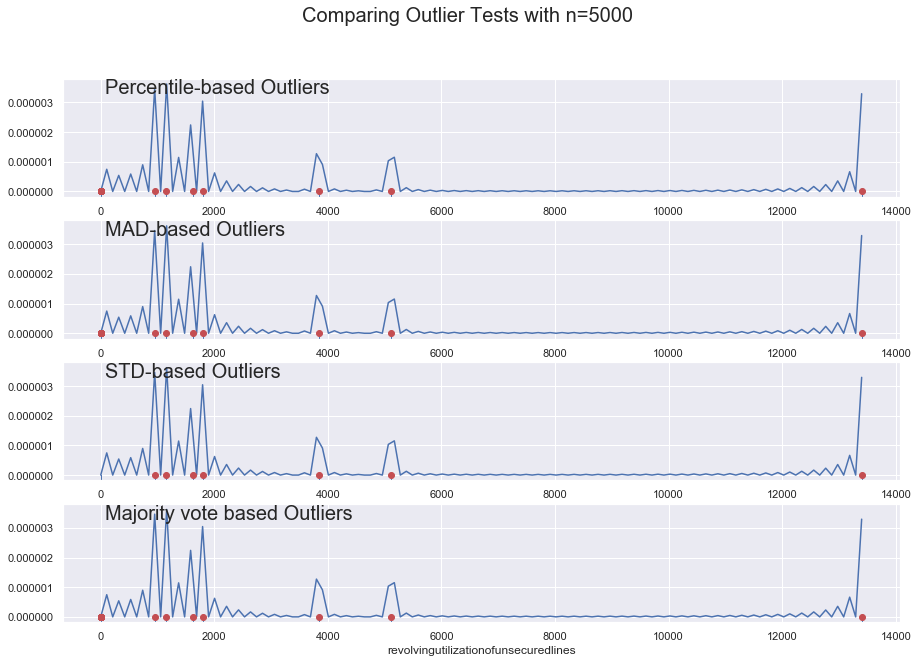

In [15]:
#Visualizing various independent variables outliers
plotOutlier(traindata.revolvingutilizationofunsecuredlines.sample(5000))

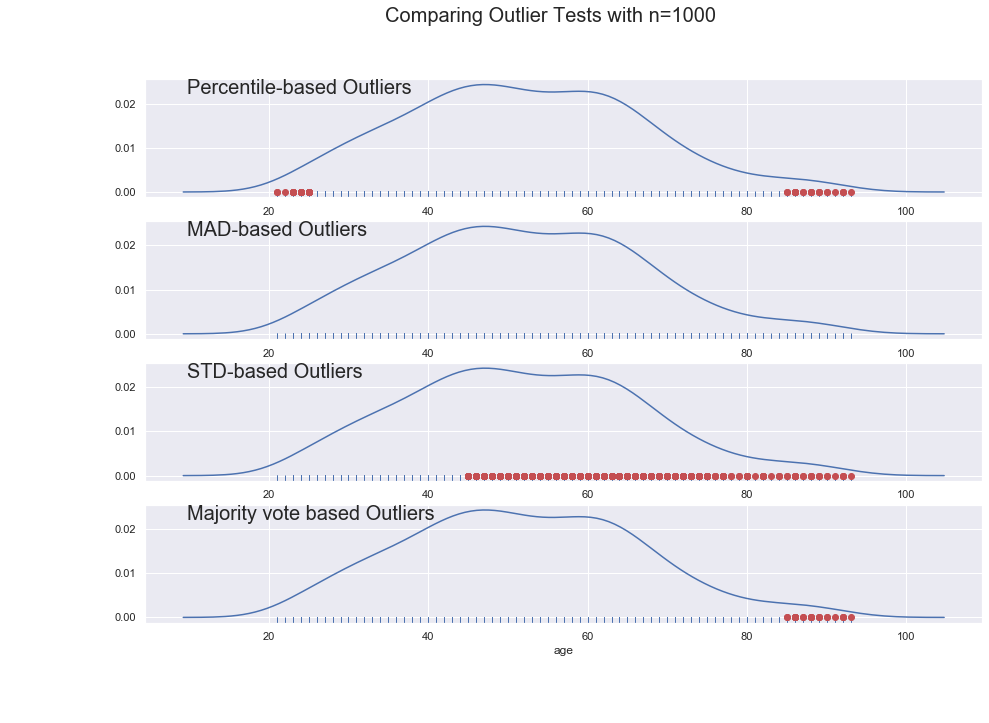

In [16]:
plotOutlier(traindata.age.sample(1000))

C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


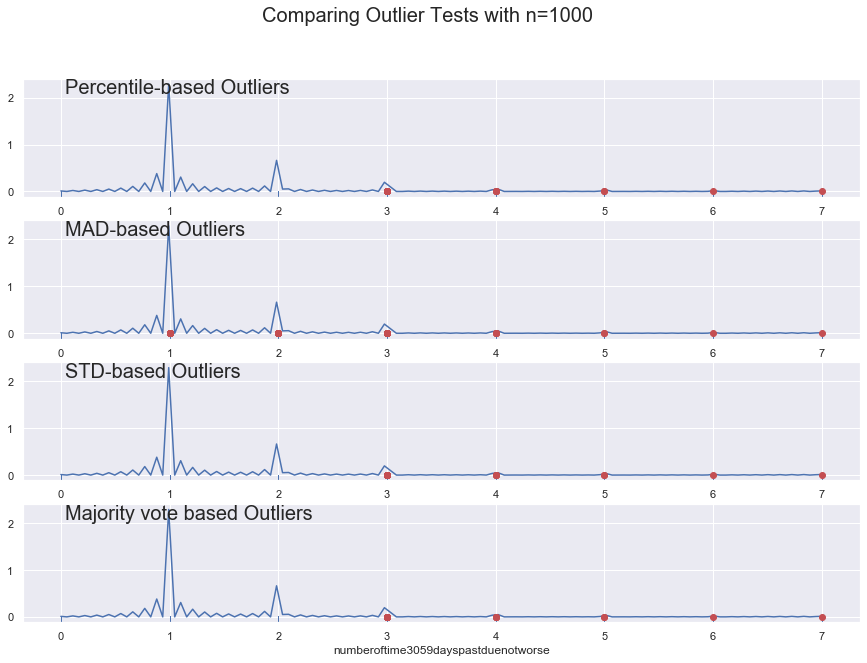

In [17]:
plotOutlier(traindata.numberoftime3059dayspastduenotworse.sample(1000))

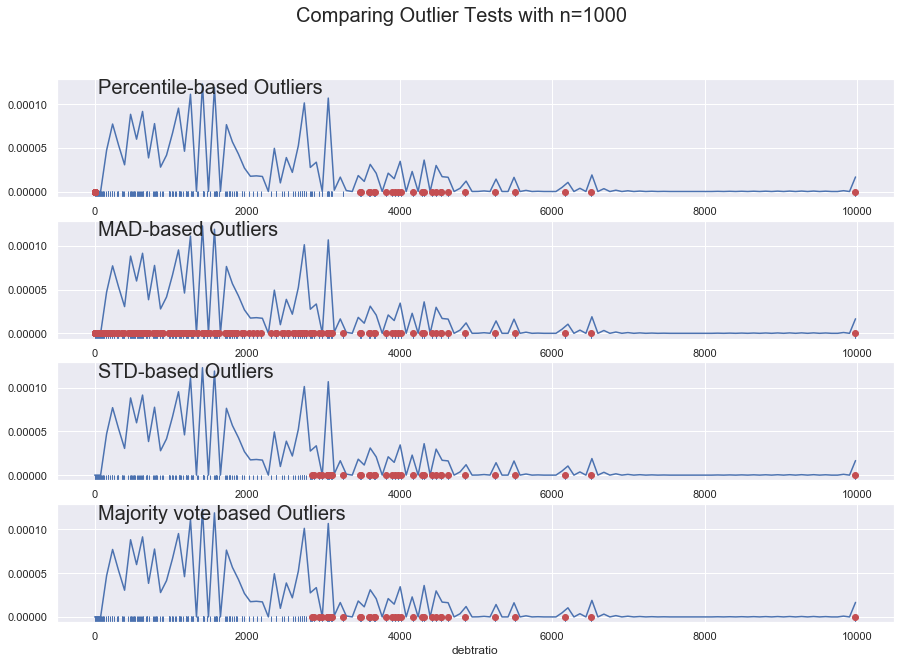

In [18]:
plotOutlier(traindata.debtratio.sample(1000))

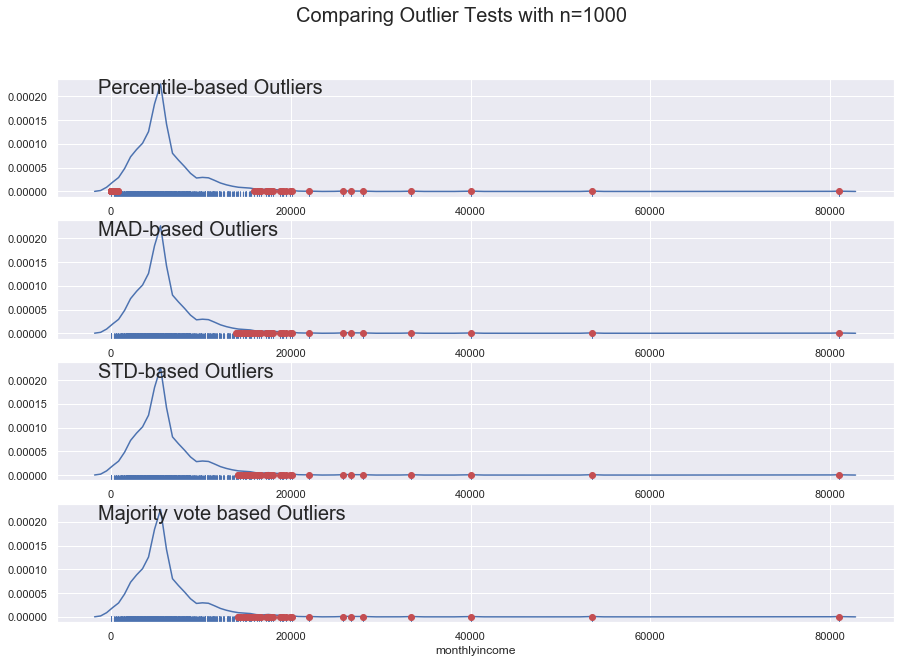

In [19]:
plotOutlier(traindata.monthlyincome.sample(1000))

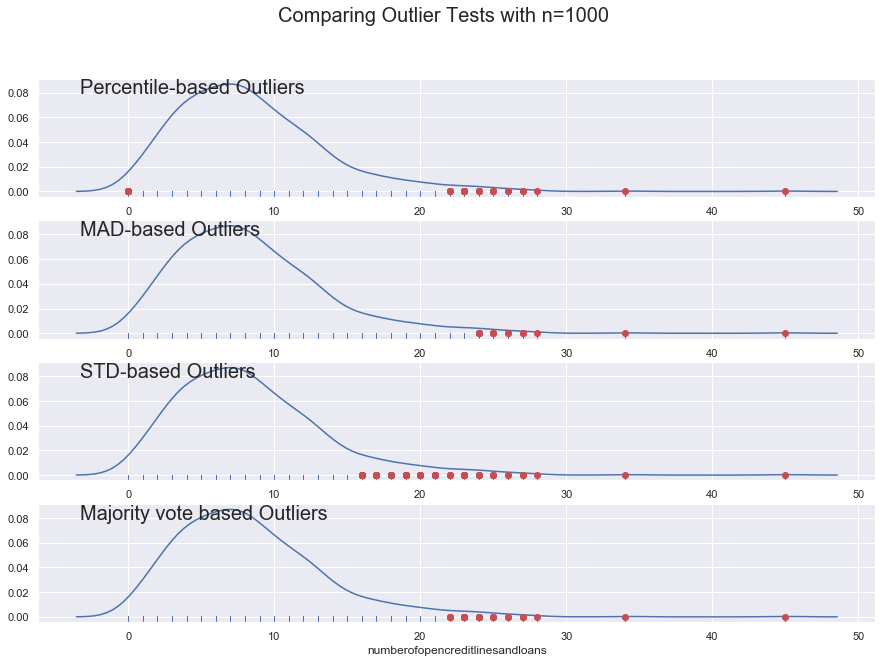

In [20]:
plotOutlier(traindata.numberofopencreditlinesandloans.sample(1000))

C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


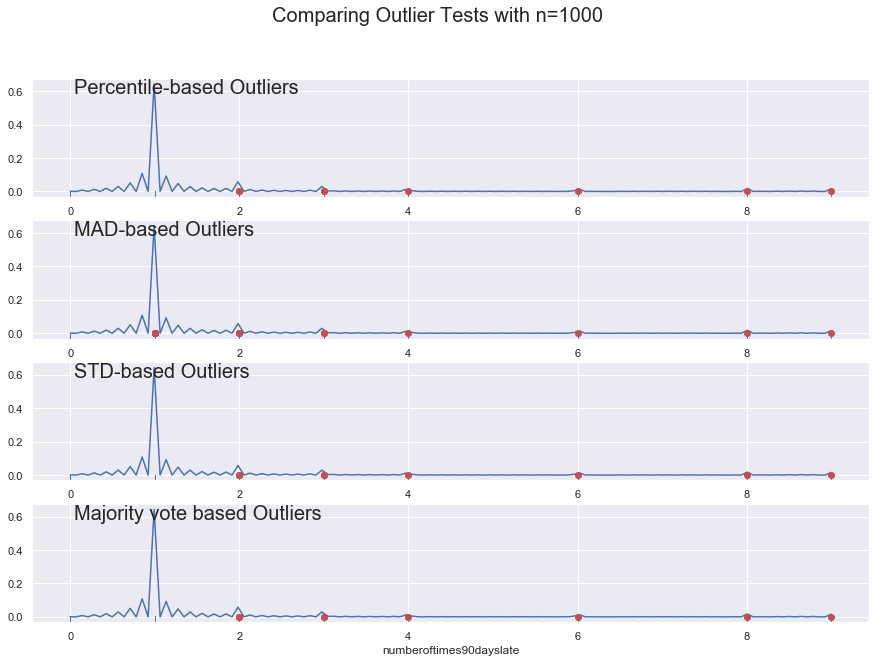

In [21]:
plotOutlier(traindata.numberoftimes90dayslate.sample(1000))

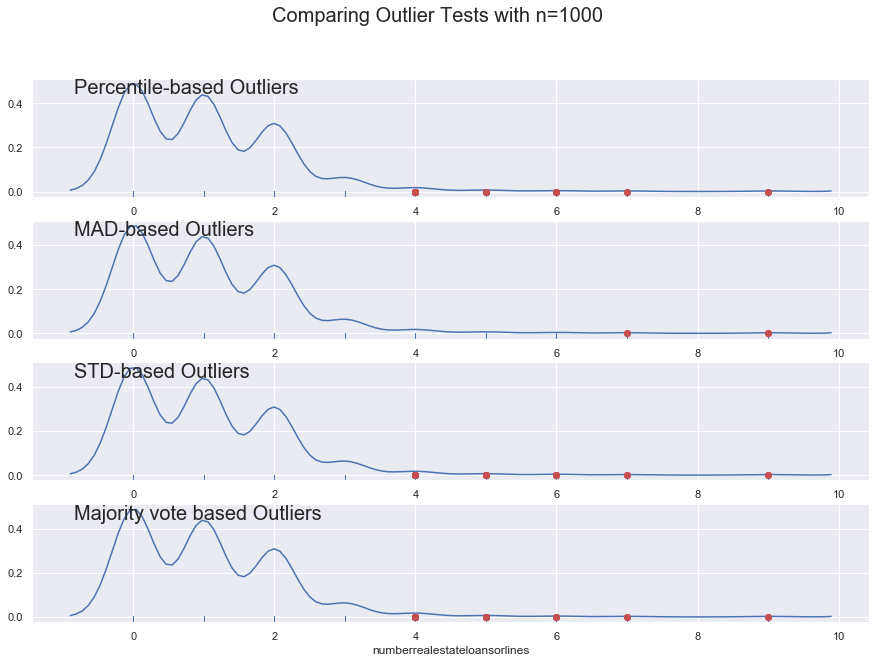

In [22]:
plotOutlier(traindata.numberrealestateloansorlines.sample(1000))

C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


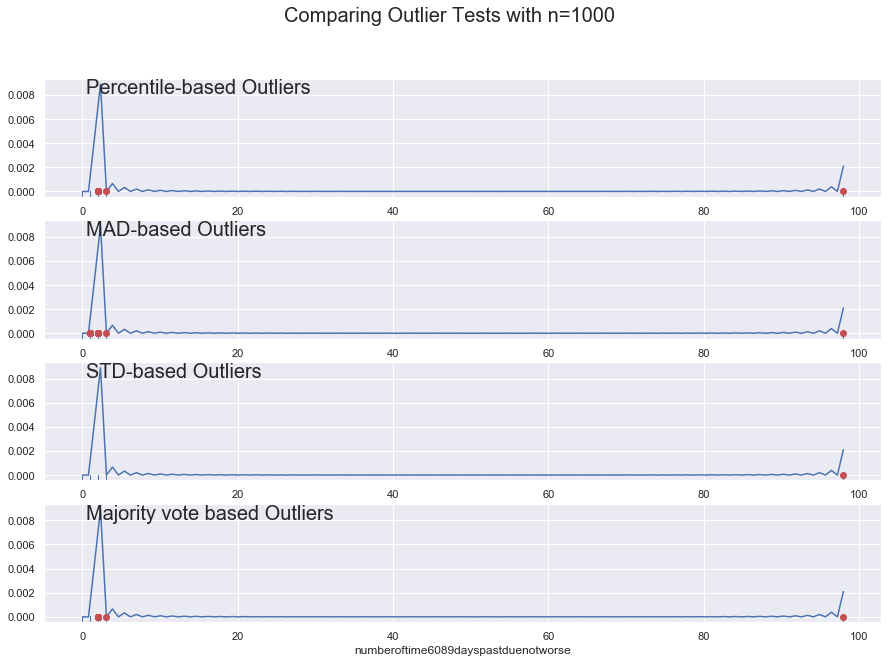

In [23]:
plotOutlier(traindata.numberoftime6089dayspastduenotworse.sample(1000))

C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


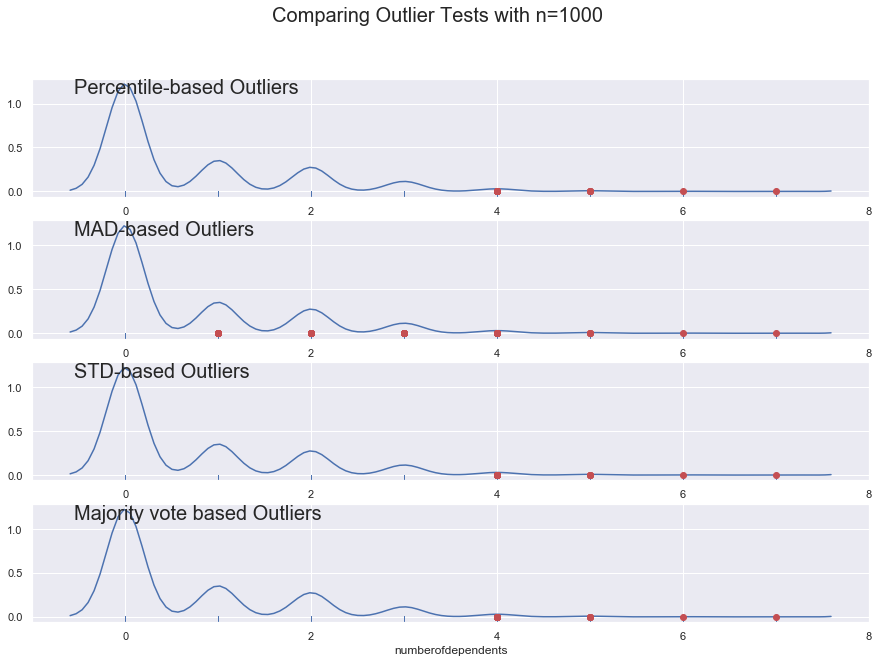

In [24]:
plotOutlier(traindata.numberofdependents.sample(1000))

In [25]:
#Handling the outliers
revNew = []
traindata.revolvingutilizationofunsecuredlines
for val in traindata.revolvingutilizationofunsecuredlines:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
traindata.revolvingutilizationofunsecuredlines = revNew

In [26]:
import collections
collections.Counter(traindata.age)

Counter({45: 3502,
         40: 3093,
         38: 2631,
         30: 1937,
         49: 3837,
         74: 1451,
         57: 3375,
         39: 2987,
         27: 1338,
         51: 3627,
         46: 3714,
         76: 1183,
         64: 3058,
         78: 1054,
         53: 3648,
         43: 3208,
         25: 953,
         32: 2050,
         58: 3443,
         50: 3753,
         69: 1954,
         24: 816,
         28: 1560,
         62: 3568,
         42: 3082,
         75: 1241,
         26: 1193,
         52: 3609,
         41: 3122,
         81: 774,
         31: 2038,
         68: 2235,
         70: 1777,
         73: 1520,
         29: 1702,
         55: 3416,
         35: 2246,
         72: 1649,
         60: 3258,
         67: 2503,
         36: 2379,
         56: 3589,
         37: 2521,
         66: 2494,
         83: 512,
         34: 2155,
         44: 3294,
         48: 3806,
         61: 3522,
         80: 876,
         47: 3719,
         59: 3280,
         77: 1099

In [27]:
ageNew = []
for val in traindata.age:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
        
traindata.age = ageNew

In [28]:
collections.Counter(traindata.numberoftime3059dayspastduenotworse)

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [29]:
New = []
med = traindata.numberoftime3059dayspastduenotworse.median()
for val in traindata.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

traindata.numberoftime3059dayspastduenotworse = New

In [30]:
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict
outlierRatio(traindata.debtratio)

{'percentile_based_outlier': [3750, '2.50%'],
 'mad_based_outlier': [31727, '21.15%'],
 'std_div': [779, '0.52%'],
 'outlierVote': [3750, '2.50%']}

In [31]:
minUpperBound = min([val for (val, out) in zip(traindata.debtratio, mad_based_outlier(traindata.debtratio)) if out == True])

In [32]:
newDebtRatio = []
for val in traindata.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

traindata.debtratio = newDebtRatio

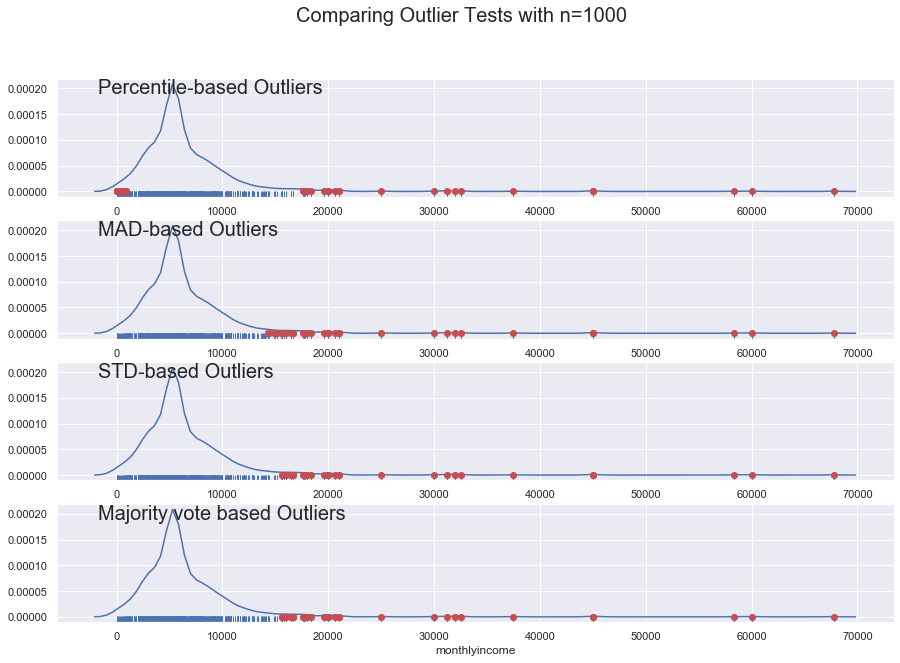

In [33]:
plotOutlier(traindata.monthlyincome.sample(1000))

In [34]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [35]:
incomeNew = replaceOutlier(traindata.monthlyincome, replace='minUpper')
traindata.monthlyincome = incomeNew

In [36]:
collections.Counter(traindata.numberoftimes90dayslate)

Counter({0: 141662,
         1: 5243,
         3: 667,
         2: 1555,
         5: 131,
         4: 291,
         98: 264,
         10: 8,
         9: 19,
         6: 80,
         7: 38,
         8: 21,
         15: 2,
         96: 5,
         11: 5,
         13: 4,
         14: 2,
         17: 1,
         12: 2})

In [37]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

new = removeSpecificAndPutMedian(traindata.numberoftimes90dayslate)
traindata.numberoftimes90dayslate = new


In [38]:
collections.Counter(traindata.numberrealestateloansorlines)

Counter({6: 320,
         0: 56188,
         1: 52338,
         3: 6300,
         4: 2170,
         2: 31522,
         5: 689,
         8: 93,
         7: 171,
         9: 78,
         17: 4,
         15: 7,
         10: 37,
         12: 18,
         11: 23,
         16: 4,
         26: 1,
         14: 7,
         54: 1,
         21: 1,
         18: 2,
         13: 15,
         23: 2,
         29: 1,
         25: 3,
         19: 2,
         20: 2,
         32: 1})

In [39]:
realNew = []
for val in traindata.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
traindata.numberrealestateloansorlines = realNew

In [40]:
collections.Counter(traindata.numberoftime6089dayspastduenotworse)

Counter({0: 142396,
         1: 5731,
         2: 1118,
         5: 34,
         3: 318,
         98: 264,
         4: 105,
         6: 16,
         7: 9,
         8: 2,
         96: 5,
         11: 1,
         9: 1})

In [41]:
new = removeSpecificAndPutMedian(traindata.numberoftime6089dayspastduenotworse)
traindata.numberoftime6089dayspastduenotworse = new

In [42]:
collections.Counter(traindata.numberofdependents)

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

In [43]:
depNew = []
for var in traindata.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

In [44]:
traindata.numberofdependents = depNew

In [45]:
#Feature importance using random forrest classifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
traindata.head()

,id,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,1,0.766127,45,2.0,0.802982,9120.0,13,0.0,6,0.0,2.0
1,2,0,0.957151,40,0.0,0.121876,2600.0,4,0.0,0,0.0,1.0
2,3,0,0.658180,38,1.0,0.085113,3042.0,2,1.0,0,0.0,0.0
3,4,0,0.233810,30,0.0,0.036050,3300.0,5,0.0,0,0.0,0.0
4,5,0,0.907239,49,1.0,0.024926,16867.0,7,0.0,1,0.0,0.0


In [49]:
X = traindata.drop('seriousdlqin2yrs', axis=1)
y = traindata.seriousdlqin2yrs
features_label = traindata.columns[1:]
forest = RandomForestClassifier (n_estimators = 1000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) seriousdlqin2yrs               0.159610
 2) revolvingutilizationofunsecuredlines 0.156455
 3) age                            0.123105
 4) numberoftime3059dayspastduenotworse 0.119567
 5) debtratio                      0.112734
 6) monthlyincome                  0.085503
 7) numberofopencreditlinesandloans 0.081790
 8) numberoftimes90dayslate        0.048362
 9) numberrealestateloansorlines   0.044185
10) numberoftime6089dayspastduenotworse 0.037138
11) numberofdependents             0.031552


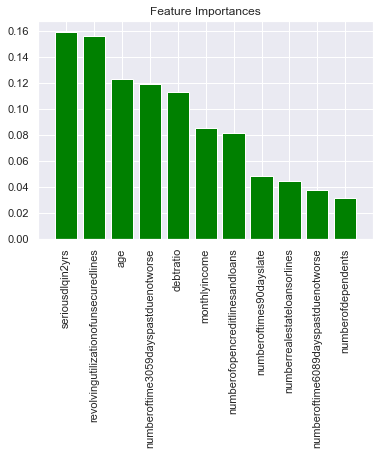

In [50]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [51]:
#Training and building a model(Start phase)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


In [52]:
X = traindata.drop('seriousdlqin2yrs', axis=1)
y = traindata.seriousdlqin2yrs

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [54]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [55]:
knMod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
knMod.score(X_test, y_test)

0.9310666666666667

In [57]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]

In [58]:

roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5147133279674863

In [59]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [60]:
glmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

In [61]:
glmMod.score(X_test, y_test)

0.9371466666666667

In [62]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]

In [63]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8474959871116658

In [64]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)


In [65]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [66]:
adaMod.score(X_test, y_test)

0.93536

In [67]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]

In [68]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.855649276226888

In [69]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [70]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [71]:
gbMod.score(X_test, y_test)

0.9366933333333334

In [72]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]

In [73]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.861726737204469

In [74]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [75]:
rfMod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [76]:
rfMod.score(X_test, y_test)

0.9333866666666667

In [77]:

test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]

In [78]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.7765404322183336

In [79]:
#Cross validation
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [80]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')
cvD

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.8s finished


{'KNeighborsClassifier': [0.510600808343139, 0.009696009313729948],
 'LogisticRegression': [0.8494707588183379, 0.003546762055240178],
 'AdaBoostClassifier': [0.8583262023284609, 0.002490764901199986],
 'GradientBoostingClassifier': [0.8153946012291525, 0.07066616225899515],
 'RandomForestClassifier': [0.7116495053442222, 0.1364442959767996]}

In [81]:
#Hyper parameter optimization using Randomized search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [82]:
#Adaboost
adaHyperParams = {'n_estimators': [10,50,100,200,420]}

In [85]:
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
             scoring='roc_auc',  cv=None, verbose=2).fit(X_train, y_train)

C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.8s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.6s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.6s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   4.7s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   7.1s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   8.0s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.0min finished


In [86]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 100}, 0.8583508715074468)

In [87]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [89]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc',  cv=None, verbose=2).fit(X_train, y_train)

C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=deviance, max_depth=2, n_estimators=73 .....................
[CV] ...... loss=deviance, max_depth=2, n_estimators=73, total=   2.9s
[CV] loss=deviance, max_depth=2, n_estimators=73 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ...... loss=deviance, max_depth=2, n_estimators=73, total=   2.6s
[CV] loss=deviance, max_depth=2, n_estimators=73 .....................
[CV] ...... loss=deviance, max_depth=2, n_estimators=73, total=   2.6s
[CV] loss=exponential, max_depth=9, n_estimators=448 .................
[CV] .. loss=exponential, max_depth=9, n_estimators=448, total= 3.3min
[CV] loss=exponential, max_depth=9, n_estimators=448 .................
[CV] .. loss=exponential, max_depth=9, n_estimators=448, total= 3.4min
[CV] loss=exponential, max_depth=9, n_estimators=448 .................
[CV] .. loss=exponential, max_depth=9, n_estimators=448, total= 3.4min
[CV] loss=exponential, max_depth=9, n_estimators=226 .................
[CV] .. loss=exponential, max_depth=9, n_estimators=226, total= 1.8min
[CV] loss=exponential, max_depth=9, n_estimators=226 .................
[CV] .. loss=exponential, max_depth=9, n_estimators=226, total= 1.7min
[CV] loss=exponential, max_depth=9, n_estimators=226 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 33.0min finished


In [90]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 3, 'n_estimators': 187},
 0.8636312387590942)

In [91]:
#Train models with help of new hyper parameter
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [92]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [93]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [94]:
cvDictbestpara

{'GradientBoostingClassifier': [0.8549484407640918, 0.010461663752967887],
 'AdaBoostClassifier': [0.8589997064474243, 0.0027446520302985685]}

In [95]:
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]

In [96]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8618220180091585

In [97]:
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]

In [98]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8564370860875377

In [99]:
#Feature Transformation
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [100]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)

In [101]:
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [102]:
cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min finished


In [103]:
cvDictbestpara_transform

{'GradientBoostingClassifier': [0.8549484550065435, 0.010463950102898158],
 'AdaBoostClassifier': [0.8589997064474243, 0.0027446520302985685]}

In [104]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)

C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [105]:
X_test_transform

array([[1.19022341e+01, 7.84581135e-02, 4.06044301e+00, ...,
        6.93147181e-01, 0.00000000e+00, 0.00000000e+00],
       [9.29357797e+00, 4.75465102e-02, 3.36729583e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.15569041e+01, 6.68638453e-01, 3.55534806e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.38629436e+00],
       ...,
       [1.17942775e+01, 8.71434765e-02, 4.15888308e+00, ...,
        6.93147181e-01, 0.00000000e+00, 0.00000000e+00],
       [9.39715183e+00, 9.10066702e-03, 4.04305127e+00, ...,
        6.93147181e-01, 0.00000000e+00, 0.00000000e+00],
       [1.09507364e+01, 8.54458872e-02, 4.07753744e+00, ...,
        6.93147181e-01, 0.00000000e+00, 1.09861229e+00]])

In [106]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [107]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8618173272618508

In [108]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [109]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8564367871673662

In [111]:
#Voting based ensamble model
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

In [112]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]

In [113]:
votingMod.score(X_test_transform, y_test)

0.93784

In [114]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8616692353106948

In [115]:
from sklearn.ensemble import VotingClassifier
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod_old = votingMod.fit(X_train, y_train)

In [116]:
test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]

In [117]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8616739490518619

In [136]:
#Testing on Real Test Dataset
# Read Training dataset as well as drop the index column
test_data = pd.read_csv(r"C:\Users\Joe Rishwanth\Desktop\ML Project\data\test.csv")
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test_data.columns)):
    cleancolumn.append(test_data.columns[i].replace('-', '').lower())
test_data.columns = cleancolumn

In [137]:
test_data.drop(['seriousdlqin2yrs'], axis=1, inplace=True)


In [138]:
test_data.fillna((traindata.median()), inplace=True)

In [139]:
test_data.head()

,id,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [142]:
test_labels_votingMod_old = votingMod_old.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [143]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod_old})

In [144]:
output.to_csv("./predictions.csv", index=False)

In [145]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
test_data_temp = np.array(test_data)
test_data_transform = transformer.transform(test_data_temp)

C:\Users\Joe Rishwanth\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [146]:
test_labels_votingMod = votingMod.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [147]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod})

In [148]:
output.to_csv("./predictions_voting_Feature_transformation.csv", index=False)